# CONEXÃO E ANÁLISE EXPLORATÓRIA DE DADOS (AED) UTILIZANDO INTEGRAÇÃO DE PYTHON AO SQL SERVER

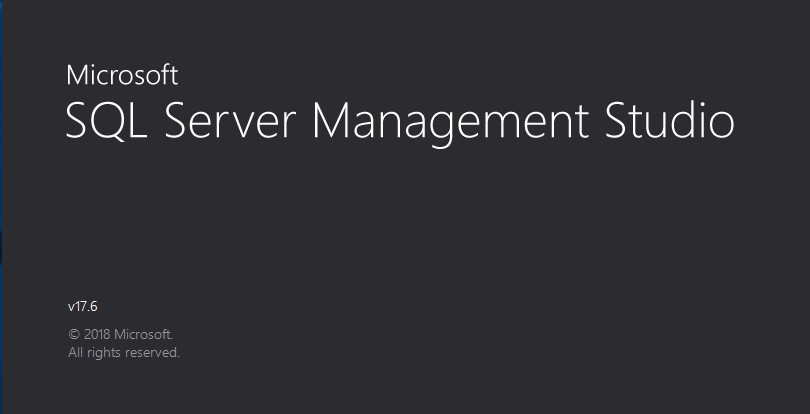

O Python apresenta uma versatilidade muito grande em relação à sua integração com outros sistemas e outras linguagens.

A utilização de bibliotecas específicas podem expadir ainda mais o poder de alcance da modelagem de pipelines, alcançando os dados necessários onde quer que eles se encontrem.

A biblioteca 'PYODBC' é responsável por realizar a interface de conexão com bancos ODBC. Nesse caso com o SQL Server.

A Goiás Market já está como o seu Data Warehouse modelado e operacional, com o BI Self-Service atuando internamente. 
A empresa agora pretende expandir sua cultura de dados e aplicar técnicas de ciência de dados com técnicas de Data Mining para descoberta de padrões e comportamentos, previsões de vendas e lucro utilizando Machine Learning e BigData Analytics para uma melhor tomada de decisão baseada em dados. 

In [1]:
# Bibliotecas utilizadas

import pyodbc # Conector do SQL Server
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')

In [2]:
# Parâmetros do Pandas

pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 100)
# pd.set_option('display.min_rows', 40)

In [3]:
# Definimos os parâmetros de conxão com o SQL Server e com o database à ser analisado. Nesse caso, o database em questão
# será o Data Warehouse da Goiás Market, o COMERCIO_DW.

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BISERVER;'
                      'Database=COMERCIO_DW;'
                      'Trusted_Connection=yes;')

In [4]:
# Verificamos o tipo do objeto (conn) criado como conexão com o SQL Server.

type(conn)

pyodbc.Connection

In [5]:
# Com a conexão realizada e verificada, podemos dar início à interação com o SQL Server, realizando as queries necessárias
# para seleção de dados e criação de pipelines com as fontes de dados.

# Para este estudo, utilizaremos a bilbioteca Pandas para realizar as queries, já criando os dataframes. A função do pandas 
# que será utilizada para realizar a interface com o SQL, será o 'read_sql', utilizando as subfunções necessárias. 

# A Query SQL pode ser definida abaixo, relacionando a tabela 'FATO' com as outras dimensões do DW através de JOIN's pelas PK
# e SK. A forma com que modela a query no Python segue da mesma maneira que no SQL Server.

# Para facilitar o entendimento da função, foi modelada ainda no SQL Server uma view com exatamente os dados abaixo. Portanto,
# fazemos um SELECT da view 'PIPELINE_FATO' e definimos o parâmetro de conexão 'conn' para executar a função de query do pandas.

# QUERY SQL / VIEW PIPELINE_FATO:

# SELECT TEMPO.DATA, 
#        FATO.IDNOTA AS INVOICE, 
#        CLIENTE.NOME AS CLIENTE, 
#        PRODUTO.NOME AS PRODUTO, 
#        CAT.NOME AS CATEGORIA, 
#        FORNECEDOR.NOME AS FORNECEDOR, 
#        VENDEDOR.NOME AS VENDEDOR, 
#        FORMAPAG.FORMA AS FORMAPAG, 
#        FATO.QUANTIDADE, 
#        FATO.TOTAL_ITEM, 
#        FATO.CUSTO_TOTAL, 
#        FATO.LUCRO_TOTAL 
# FROM FATO FATO
# INNER JOIN DIM_CLIENTE CLIENTE ON FATO.IDCLIENTE = CLIENTE.IDCLIENTE
# INNER JOIN DIM_PRODUTO PRODUTO ON FATO.IDPRODUTO = PRODUTO.IDPRODUTO
# INNER JOIN DIM_VENDEDOR VENDEDOR ON FATO.IDVENDEDOR = VENDEDOR.IDVENDEDOR
# INNER JOIN CATEGORIA CAT ON PRODUTO.ID_CATEGORIA = CAT.IDCATEGORIA
# INNER JOIN DIM_FORNECEDOR FORNECEDOR ON FATO.IDFORNECEDOR = FORNECEDOR.IDFORNECEDOR
# INNER JOIN DIM_TEMPO TEMPO ON FATO.IDTEMPO = TEMPO.IDSK
# INNER JOIN DIM_FORMA FORMAPAG ON FATO.IDFORMA = FORMAPAG.IDFORMA


df_fato = pd.read_sql_query('SELECT * FROM PIPELINE_FATO',conn)

# Realizamos a query e gravamos os resultados em um dataframe 'df_fato'.
print(df_fato.head(20))

          DATA  INVOICE            CLIENTE                   PRODUTO         CATEGORIA  \
0   2017-01-01      288         Alex Souza            Poderoso Chefe              DVDS   
1   2017-01-01      288         Alex Souza                     Wario             GAMES   
2   2017-01-01     3069         Luan Rocha             Exchange 2014            LIVROS   
3   2017-01-01     3069         Luan Rocha                Xtg Rad D3       INFORMATICA   
4   2017-01-01     3870        Kauê Santos          Notebook Msft 17       INFORMATICA   
5   2017-01-01     3870        Kauê Santos         Notebook Hp Inove       INFORMATICA   
6   2017-01-01     2584     Leonardo Sousa             Playstation 3             GAMES   
7   2017-01-01     1962     Vitór Ferreira  Windows 2016 Visao Geral            LIVROS   
8   2017-01-01     3800     Douglas Barros                     Hd 2t       INFORMATICA   
9   2017-01-01      941        Kauan Alves             Desktop P5 Hp       INFORMATICA   
10  2017-0

In [6]:
# Verificamsos as colunas do dataframe.

df_fato.columns

Index(['DATA', 'INVOICE', 'CLIENTE', 'PRODUTO', 'CATEGORIA', 'FORNECEDOR', 'VENDEDOR', 'FORMAPAG',
       'QUANTIDADE', 'TOTAL_ITEM', 'CUSTO_TOTAL', 'LUCRO_TOTAL'],
      dtype='object')

In [7]:
# Verificamos o tamanho do dataframe por um shape.

df_fato.shape

(30784, 12)

# FEATURE ENGINEERING

In [8]:
# Realizamos uma cópia do dataframe original para podermos trabalhar melhor com modificações, preservando a integridade
# dos dados originais.

data1 = df_fato.copy()

In [9]:
# Buscamos por valores não nulos e a tipagem das colunas.
# Podemos ver que a coluna 'DATA' está como object e será transformada para tipo date. E a coluna 'INVOCIE' está como 
#tipo int, e será transformada em str, pois esta não se trata de uma feature numérica e sim string.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30784 entries, 0 to 30783
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATA         30784 non-null  object 
 1   INVOICE      30784 non-null  int64  
 2   CLIENTE      30784 non-null  object 
 3   PRODUTO      30784 non-null  object 
 4   CATEGORIA    30784 non-null  object 
 5   FORNECEDOR   30784 non-null  object 
 6   VENDEDOR     30784 non-null  object 
 7   FORMAPAG     30784 non-null  object 
 8   QUANTIDADE   30784 non-null  int64  
 9   TOTAL_ITEM   30784 non-null  float64
 10  CUSTO_TOTAL  30784 non-null  float64
 11  LUCRO_TOTAL  30784 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 2.8+ MB


In [10]:
# Transformamos a coluna 'INVOICE' em tipo string.

data1['INVOICE'] = data1['INVOICE'].astype('str')

print(df_fato)

             DATA  INVOICE          CLIENTE            PRODUTO         CATEGORIA  \
0      2017-01-01      288       Alex Souza     Poderoso Chefe              DVDS   
1      2017-01-01      288       Alex Souza              Wario             GAMES   
2      2017-01-01     3069       Luan Rocha      Exchange 2014            LIVROS   
3      2017-01-01     3069       Luan Rocha         Xtg Rad D3       INFORMATICA   
4      2017-01-01     3870      Kauê Santos   Notebook Msft 17       INFORMATICA   
...           ...      ...              ...                ...               ...   
30779  2020-12-27    17015      Bruno Sousa      Desktop A5 Hp       INFORMATICA   
30780  2020-12-27    18767       Ana Santos      Cartoon Movie             GAMES   
30781  2020-12-27    18925    Breno Correia  Sao Paulo / Miami         PASSAGENS   
30782  2020-12-27    19481  Melissa Azevedo    Lavadora Lg 10l  ELETRODOMESTICOS   
30783  2020-12-27    16800  Estevan Barbosa     Poderoso Chefe              

In [11]:
# Verificamos novamente os tipo do dataframe e constatamos a transformação da coluna 'INVOICE'.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30784 entries, 0 to 30783
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATA         30784 non-null  object 
 1   INVOICE      30784 non-null  object 
 2   CLIENTE      30784 non-null  object 
 3   PRODUTO      30784 non-null  object 
 4   CATEGORIA    30784 non-null  object 
 5   FORNECEDOR   30784 non-null  object 
 6   VENDEDOR     30784 non-null  object 
 7   FORMAPAG     30784 non-null  object 
 8   QUANTIDADE   30784 non-null  int64  
 9   TOTAL_ITEM   30784 non-null  float64
 10  CUSTO_TOTAL  30784 non-null  float64
 11  LUCRO_TOTAL  30784 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [12]:
# Transformamos a coluna 'DATA' em tipo datetime.

data1['DATA'] = pd.to_datetime(data1['DATA'])

In [13]:
# Verificamos e constatamos a transformação, com a coluna DATA em tipo datetime.

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30784 entries, 0 to 30783
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA         30784 non-null  datetime64[ns]
 1   INVOICE      30784 non-null  object        
 2   CLIENTE      30784 non-null  object        
 3   PRODUTO      30784 non-null  object        
 4   CATEGORIA    30784 non-null  object        
 5   FORNECEDOR   30784 non-null  object        
 6   VENDEDOR     30784 non-null  object        
 7   FORMAPAG     30784 non-null  object        
 8   QUANTIDADE   30784 non-null  int64         
 9   TOTAL_ITEM   30784 non-null  float64       
 10  CUSTO_TOTAL  30784 non-null  float64       
 11  LUCRO_TOTAL  30784 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 2.8+ MB


In [14]:
# Criamos duas features para auxiliar a data, segregando o mes e ano da coluna 'DATA' de suas respectivas datas.

data1['ANO'] = data1['DATA'].dt.year
data1['MES'] = data1['DATA'].dt.month

print(data1)

            DATA INVOICE          CLIENTE            PRODUTO         CATEGORIA  \
0     2017-01-01     288       Alex Souza     Poderoso Chefe              DVDS   
1     2017-01-01     288       Alex Souza              Wario             GAMES   
2     2017-01-01    3069       Luan Rocha      Exchange 2014            LIVROS   
3     2017-01-01    3069       Luan Rocha         Xtg Rad D3       INFORMATICA   
4     2017-01-01    3870      Kauê Santos   Notebook Msft 17       INFORMATICA   
...          ...     ...              ...                ...               ...   
30779 2020-12-27   17015      Bruno Sousa      Desktop A5 Hp       INFORMATICA   
30780 2020-12-27   18767       Ana Santos      Cartoon Movie             GAMES   
30781 2020-12-27   18925    Breno Correia  Sao Paulo / Miami         PASSAGENS   
30782 2020-12-27   19481  Melissa Azevedo    Lavadora Lg 10l  ELETRODOMESTICOS   
30783 2020-12-27   16800  Estevan Barbosa     Poderoso Chefe              DVDS   

               

In [15]:
# Transformando as features 'ANO' e 'MES', em string.

data1['ANO'] = data1['ANO'].astype('str')
data1['MES'] = data1['MES'].astype('str')

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30784 entries, 0 to 30783
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA         30784 non-null  datetime64[ns]
 1   INVOICE      30784 non-null  object        
 2   CLIENTE      30784 non-null  object        
 3   PRODUTO      30784 non-null  object        
 4   CATEGORIA    30784 non-null  object        
 5   FORNECEDOR   30784 non-null  object        
 6   VENDEDOR     30784 non-null  object        
 7   FORMAPAG     30784 non-null  object        
 8   QUANTIDADE   30784 non-null  int64         
 9   TOTAL_ITEM   30784 non-null  float64       
 10  CUSTO_TOTAL  30784 non-null  float64       
 11  LUCRO_TOTAL  30784 non-null  float64       
 12  ANO          30784 non-null  object        
 13  MES          30784 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 3.3+ MB


In [17]:
print(data1)

            DATA INVOICE          CLIENTE            PRODUTO         CATEGORIA  \
0     2017-01-01     288       Alex Souza     Poderoso Chefe              DVDS   
1     2017-01-01     288       Alex Souza              Wario             GAMES   
2     2017-01-01    3069       Luan Rocha      Exchange 2014            LIVROS   
3     2017-01-01    3069       Luan Rocha         Xtg Rad D3       INFORMATICA   
4     2017-01-01    3870      Kauê Santos   Notebook Msft 17       INFORMATICA   
...          ...     ...              ...                ...               ...   
30779 2020-12-27   17015      Bruno Sousa      Desktop A5 Hp       INFORMATICA   
30780 2020-12-27   18767       Ana Santos      Cartoon Movie             GAMES   
30781 2020-12-27   18925    Breno Correia  Sao Paulo / Miami         PASSAGENS   
30782 2020-12-27   19481  Melissa Azevedo    Lavadora Lg 10l  ELETRODOMESTICOS   
30783 2020-12-27   16800  Estevan Barbosa     Poderoso Chefe              DVDS   

               

# EXPLORATORY DATA ANALYSIS

In [18]:
# Verificamos as colunas do dataframe.

data1.columns

Index(['DATA', 'INVOICE', 'CLIENTE', 'PRODUTO', 'CATEGORIA', 'FORNECEDOR', 'VENDEDOR', 'FORMAPAG',
       'QUANTIDADE', 'TOTAL_ITEM', 'CUSTO_TOTAL', 'LUCRO_TOTAL', 'ANO', 'MES'],
      dtype='object')

In [19]:
# Contamos os valores únicos de cada feature categórica. 

data1[['INVOICE','CLIENTE','PRODUTO','CATEGORIA','FORNECEDOR','VENDEDOR','FORMAPAG']].nunique()

INVOICE       20000
CLIENTE         891
PRODUTO         226
CATEGORIA         9
FORNECEDOR       41
VENDEDOR         24
FORMAPAG         23
dtype: int64

In [20]:
# Extraímos os dados estatísticos das features numéricas. 

data1.describe()

,QUANTIDADE,TOTAL_ITEM,CUSTO_TOTAL,LUCRO_TOTAL
count,30784.00000,30784.00000,30784.00000,30784.00000
mean,2.21459,2174.80009,1603.29223,571.50786
std,1.04102,3007.65300,2421.91192,783.41547
min,1.00000,24.00000,10.00000,11.00000
25%,1.00000,234.00000,120.00000,79.00000
50%,2.00000,780.00000,480.00000,240.00000
75%,3.00000,3000.00000,2030.00000,798.00000
max,4.00000,21600.00000,20080.00000,7204.00000


## EDA - PRODUTO / CATEGORIA

In [21]:
# Contamos as entradas únicas de produto por cada categoria.

data1['PRODUTO'].groupby(data1['CATEGORIA']).nunique()

CATEGORIA
CELULARES           23
DVDS                20
ELETRODOMESTICOS    19
GAMES               22
INFORMATICA         73
LIVROS              15
MOVEIS               9
PASSAGENS           21
TV E AUDIO          24
Name: PRODUTO, dtype: int64

<AxesSubplot:title={'center':'TOTAL DE PRODUTOS POR CATEGORIA'}, ylabel='PRODUTO'>

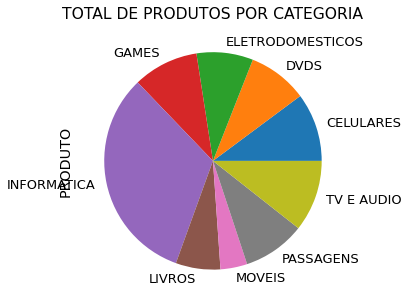

In [22]:
# Plotamos em um gráficos de pizza a distribuição dos produtos por categoria. 

data1['PRODUTO'].groupby(data1['CATEGORIA']).nunique().plot(kind='pie', title='TOTAL DE PRODUTOS POR CATEGORIA', 
                                                              xlabel ='CATEGORIA', figsize=(8,5))

## EDA - NOTAS POR FORMA DE PAGAMENTO

In [23]:
# Contamos quantas notas de compra (INVOICE) distinta temos utilizada cada forma de pagamento (FORMAPAG).

data1['INVOICE'].groupby(data1['FORMAPAG']).nunique()

FORMAPAG
Boleto - Vista                   762
Cartão American - Vencimento     759
Cartão American 10 vezes         768
Cartão American 12 vezes         802
Cartão American 5 vezes          775
Cartão Master - Vencimento       726
Cartão Master 10 vezes           796
Cartão Master 2 vezes            791
Cartão Master 3 vezes            743
Cartão Master 4 vezes            758
Cartão Master 5 vezes            786
Cartão Visa - Vencimento         792
Cartão Visa 10 vezes             803
Cartão Visa 2 vezes             1518
Cartão Visa 3 vezes             1574
Cartão Visa 4 vezes             1465
Cartão Visa 5 vezes              755
Depósito - Vista                 790
Pagamento Seguro Web - Vista     764
Pay Pall - 12 vezes              794
Pay Pall - 5 vezes               732
Pay Pall - Vista                 793
Tranferência - Vista             754
Name: INVOICE, dtype: int64

<AxesSubplot:xlabel='FORMAPAG'>

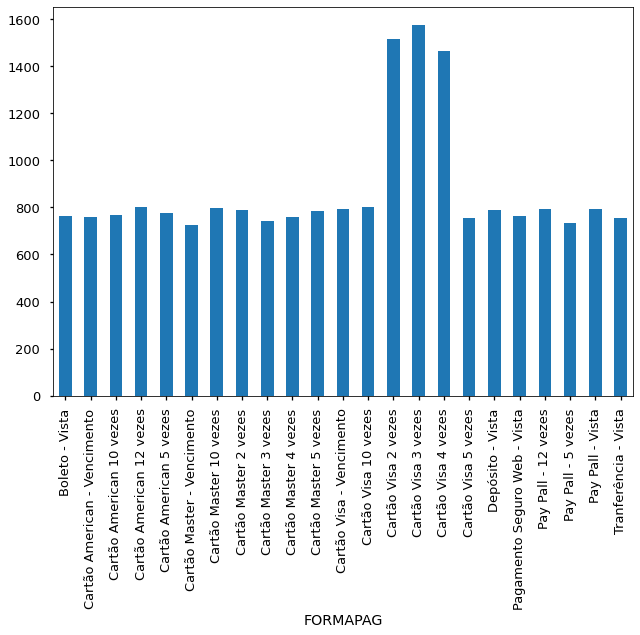

In [24]:
# Plotamos em um gráfico de barras a distribuição de forma de bagamentos.

data1['INVOICE'].groupby(data1['FORMAPAG']).nunique().plot(kind='bar')

In [25]:
# Verificamos a quantidade de vendas por cada categoria, considerando que uma mesma nota pode levar de 1 a n artigos. 
# Em outras palavras, esta função conta cada venda de cada categoria, sendo que 1 nota pode apresentar 2 ou mais artigos 
# da mesma categoria.

data1['INVOICE'].groupby(data1['CATEGORIA']).count()

CATEGORIA
CELULARES            3074
DVDS                 2702
ELETRODOMESTICOS     2514
GAMES                2933
INFORMATICA         10431
LIVROS               2006
MOVEIS               1217
PASSAGENS            2831
TV E AUDIO           3076
Name: INVOICE, dtype: int64

<AxesSubplot:title={'center':'TOTAL NOTAS POR CATEGORIA'}, xlabel='CATEGORIA'>

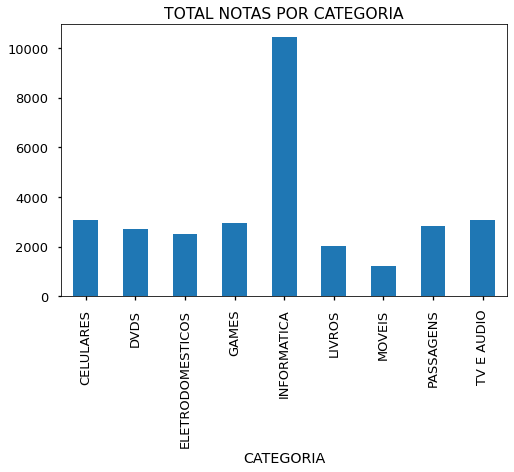

In [26]:
# Plotamos a distribuição de quantidade de notas por cada categoria. 

data1['INVOICE'].groupby(data1['CATEGORIA']).count().plot(kind='bar', title='TOTAL NOTAS POR CATEGORIA', 
                                                              xlabel ='CATEGORIA', figsize=(8,5))

## EDA - VENDAS POR CATEGORIA

In [27]:
# Verificamos o total de vendas agregado por cada categoria, com a soma dos valores.

data1.groupby(['CATEGORIA'])[['TOTAL_ITEM','LUCRO_TOTAL']].sum()

,TOTAL_ITEM,LUCRO_TOTAL
CATEGORIA,,
CELULARES,6333874.0,2154946.0
DVDS,566304.0,247326.0
ELETRODOMESTICOS,8004991.0,1768005.0
GAMES,1580031.0,772081.0
INFORMATICA,21893839.0,7351751.0
LIVROS,357641.0,161895.0
MOVEIS,4082000.0,923843.0
PASSAGENS,7477640.0,825914.0
TV E AUDIO,16652726.0,3387537.0


<AxesSubplot:title={'center':'VENDAS / LUCRO POR CATEGORIA'}, xlabel='CATEGORIA', ylabel='TOTAL'>

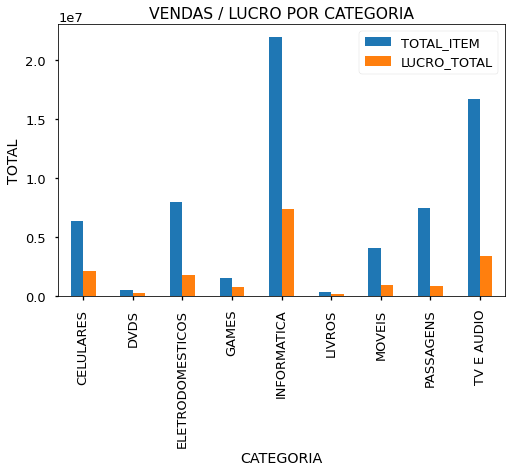

In [28]:
# Plotamos as vendas e o lucro alcançado por cada categoria. 

data1.groupby(['CATEGORIA'])[['TOTAL_ITEM','LUCRO_TOTAL']].sum().plot(kind='bar', title='VENDAS / LUCRO POR CATEGORIA',
                                                                       ylabel = 'TOTAL', figsize=(8,5))

# HISTOGRAMS

(array([1.7592e+04, 1.9860e+03, 3.4500e+02, 6.7000e+01, 1.0000e+01]),
 array([1.00000e+01, 6.34080e+03, 1.26716e+04, 1.90024e+04, 2.53332e+04,
        3.16640e+04]),
 <BarContainer object of 5 artists>)

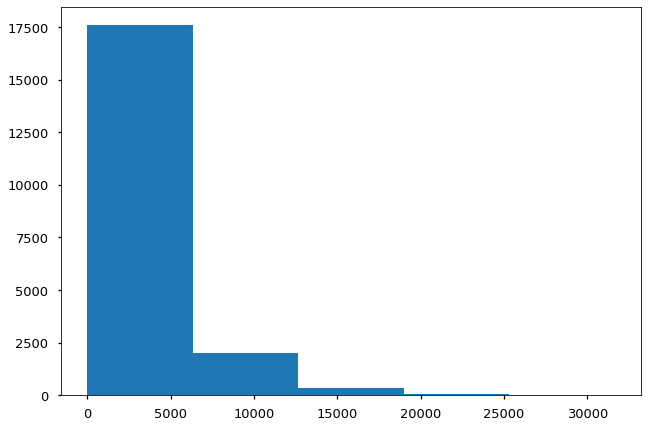

In [29]:
# Distribuição do custo total agregado por notas (INVOICE).

plt.hist(data1['CUSTO_TOTAL'].groupby(data1['INVOICE']).sum(), bins = 5)


(array([16891.,  2467.,   530.,    95.,    17.]),
 array([2.40000e+01, 7.29920e+03, 1.45744e+04, 2.18496e+04, 2.91248e+04,
        3.64000e+04]),
 <BarContainer object of 5 artists>)

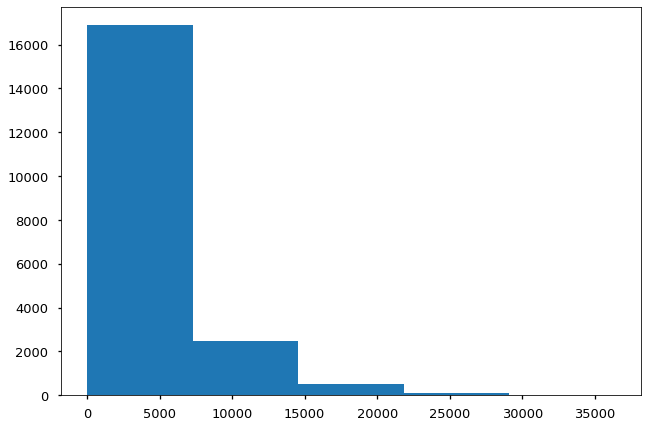

In [30]:
# Distribuição das vendas totais agregado por notas (INVOICE).

plt.hist(data1['TOTAL_ITEM'].groupby(data1['INVOICE']).sum(), bins = 5)

(array([1.8888e+04, 1.0260e+03, 7.8000e+01, 7.0000e+00, 1.0000e+00]),
 array([1.10000e+01, 3.11920e+03, 6.22740e+03, 9.33560e+03, 1.24438e+04,
        1.55520e+04]),
 <BarContainer object of 5 artists>)

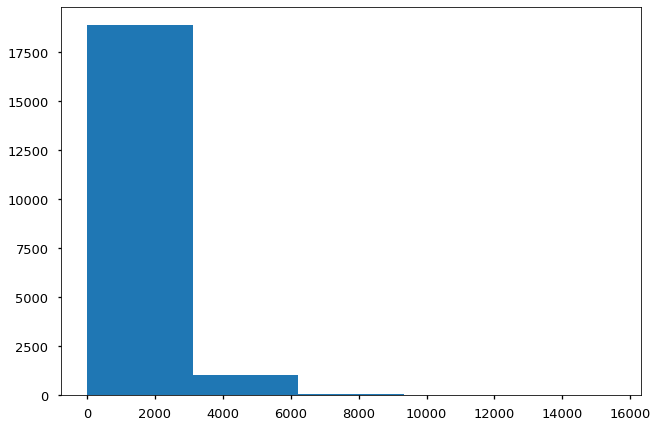

In [31]:
# Distribuição do lucro total agregado por notas (INVOICE).

plt.hist(data1['LUCRO_TOTAL'].groupby(data1['INVOICE']).sum(), bins = 5)

# ANÁLISE TEMPORAL

In [32]:
# Realizamos uma cópia do dataframe para trabalharmos exclusivamente com análise temporal.

data_atemp = data1.copy()

In [33]:
# Contagem de vendas agregadas por cada ano.

data_atemp['INVOICE'].groupby(data_atemp['ANO']).count()

ANO
2017    7738
2018    7640
2019    7755
2020    7651
Name: INVOICE, dtype: int64

<AxesSubplot:title={'center':'QUANTIDADE DE VENDAS POR ANO'}, xlabel='ANO'>

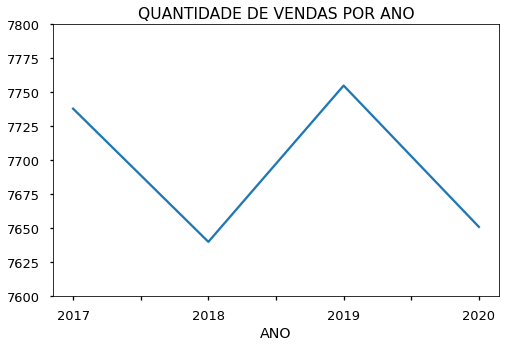

In [34]:
# Evolução de vendas ao longo dos anos

data_atemp['INVOICE'].groupby(data_atemp['ANO']).count().plot.line(ylim = (7600,7800), title='QUANTIDADE DE VENDAS POR ANO', 
                                                              xlabel ='ANO', figsize=(8,5))

In [35]:
# Pivot de Vendas por Ano e Categoria

data_atemp.groupby(['ANO', 'CATEGORIA'])['TOTAL_ITEM'].sum().unstack(0)

ANO,2017,2018,2019,2020
CATEGORIA,,,,
CELULARES,1538960.0,1583748.0,1729431.0,1481735.0
DVDS,134840.0,137413.0,146301.0,147750.0
ELETRODOMESTICOS,1752407.0,2056837.0,2191208.0,2004539.0
GAMES,375372.0,396239.0,385164.0,423256.0
INFORMATICA,5504111.0,5418001.0,5393778.0,5577949.0
LIVROS,96885.0,86368.0,88578.0,85810.0
MOVEIS,984400.0,1016500.0,1060200.0,1020900.0
PASSAGENS,1903660.0,1943170.0,1717070.0,1913740.0
TV E AUDIO,4280145.0,4007899.0,4164844.0,4199838.0


In [36]:
# Pivot de contagem de vendas por Ano e Categoria.

data_atemp.groupby(['ANO', 'CATEGORIA'])['TOTAL_ITEM'].count().unstack(0)

ANO,2017,2018,2019,2020
CATEGORIA,,,,
CELULARES,737,810,789,738
DVDS,666,654,673,709
ELETRODOMESTICOS,651,624,638,601
GAMES,737,714,724,758
INFORMATICA,2599,2594,2680,2558
LIVROS,539,460,502,505
MOVEIS,290,301,319,307
PASSAGENS,730,727,670,704
TV E AUDIO,789,756,760,771


In [37]:
# Pivot de Vendas por Ano e Categoria. Um modo diferente de se apresentar os dados utilizando .unstack()

data_atemp.groupby(['ANO', 'CATEGORIA'])['TOTAL_ITEM'].sum().unstack(1)

CATEGORIA,CELULARES,DVDS,ELETRODOMESTICOS,GAMES,INFORMATICA,LIVROS,MOVEIS,PASSAGENS,TV E AUDIO
ANO,,,,,,,,,
2017,1538960.0,134840.0,1752407.0,375372.0,5504111.0,96885.0,984400.0,1903660.0,4280145.0
2018,1583748.0,137413.0,2056837.0,396239.0,5418001.0,86368.0,1016500.0,1943170.0,4007899.0
2019,1729431.0,146301.0,2191208.0,385164.0,5393778.0,88578.0,1060200.0,1717070.0,4164844.0
2020,1481735.0,147750.0,2004539.0,423256.0,5577949.0,85810.0,1020900.0,1913740.0,4199838.0


In [38]:
# Pivot de contagem de vendas de Ano por Categoria. Um modo diferente de se apresentar os dados utilizando .unstack()

data_atemp.groupby(['ANO', 'CATEGORIA'])['TOTAL_ITEM'].count().unstack(1)

CATEGORIA,CELULARES,DVDS,ELETRODOMESTICOS,GAMES,INFORMATICA,LIVROS,MOVEIS,PASSAGENS,TV E AUDIO
ANO,,,,,,,,,
2017,737,666,651,737,2599,539,290,730,789
2018,810,654,624,714,2594,460,301,727,756
2019,789,673,638,724,2680,502,319,670,760
2020,738,709,601,758,2558,505,307,704,771


<AxesSubplot:title={'center':'TOTAL VENDAS POR CATEGORIA POR ANO'}, xlabel='TOTAL VENDAS'>

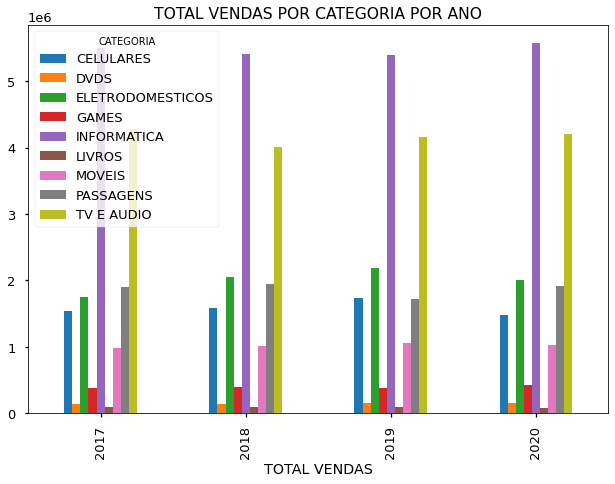

In [39]:
# Plot de total de vendas por categoria, agrupadas por ano.

data_atemp.groupby(['ANO', 'CATEGORIA'])['TOTAL_ITEM'].sum().unstack(1).plot.bar(title = 'TOTAL VENDAS POR CATEGORIA POR ANO',
                                                                                xlabel = 'TOTAL VENDAS')

In [40]:
# Pivot de total vendas por Ano e Mes.

data_atemp.groupby(['ANO','MES'])['TOTAL_ITEM'].sum().unstack(0)

ANO,2017,2018,2019,2020
MES,,,,
1,1483829.0,1548665.0,1269116.0,1455808.0
10,1409959.0,1288179.0,1341195.0,1428962.0
11,1335708.0,1327136.0,1565963.0,1277161.0
12,1479976.0,1373437.0,1563567.0,1412721.0
2,1450451.0,1555502.0,1332635.0,1485332.0
3,1279095.0,1322163.0,1340646.0,1397699.0
4,1237115.0,1247224.0,1416548.0,1349695.0
5,1489284.0,1560074.0,1492916.0,1302539.0
6,1254511.0,1271805.0,1376649.0,1311144.0
